In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# SIR Euler Method (constant $\beta$)

In [2]:
beta=0.58
gamma=1/10

def SIR(i0,N,nbjours):


    # Creation of lists
    S=np.zeros(nbjours)
    I=np.zeros(nbjours)
    R=np.zeros(nbjours)

    # Initial Condition
    I[0]=i0
    S[0]=N-i0

    #Propagation
    for i in range(nbjours-1):
        S[i+1]=S[i]-beta*I[i]*S[i]/N
        I[i+1]=I[i]+beta*I[i]*S[i]/N - gamma*I[i]
        R[i+1]=R[i]+gamma*I[i]

    return S,I,R

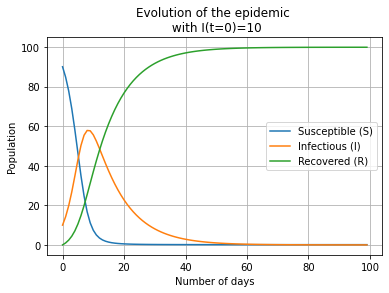

In [3]:
S,I,R=SIR(10,100,100)
plt.plot(S,label="Susceptible (S)")
plt.plot(I,label="Infectious (I)")
plt.plot(R,label="Recovered (R)")
plt.xlabel("Number of days")
plt.ylabel("Population")
plt.title(f"Evolution of the epidemic \n with I(t=0)={int(I[0])}")
plt.legend()
plt.grid(True)
plt.show()

# SIR RK2 Method (constant $\beta$)

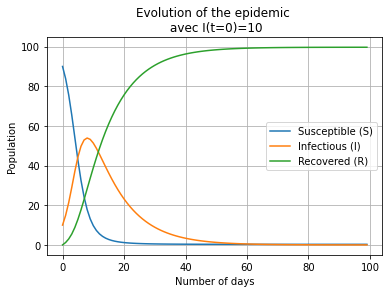

In [5]:
def SIRK2(i0,N,nbjours):

  dt = 1
  # Creation of lists
  S=np.zeros(nbjours)
  I=np.zeros(nbjours)
  R=np.zeros(nbjours)

  # Initial Condition
  I[0]=i0
  S[0]=N-i0
  for i in range(nbjours - 1):
      #k1
      k1_S = (-beta * S[i] * I[i]) / N * dt
      k1_I = ((beta * S[i] * I[i]) / N - gamma * I[i] ) * dt
      k1_R = gamma * I[i] * dt

      #Un + k1

      S_k1 = S[i] + k1_S
      I_k1 = I[i] + k1_I
      R_k1 = R[i] + k1_R

      #k2
      k2_S = (-beta * S_k1 * I_k1) / N * dt
      k2_I = (beta * S_k1 * I_k1) / N - gamma * I_k1 * dt
      k2_R = gamma * I_k1 * dt

      #Un+1
      S[i+1] = S[i] + 0.5 * (k1_S + k2_S)
      I[i+1] = I[i] + 0.5 * (k1_I + k2_I)
      R[i+1] = R[i] + 0.5 * (k1_R + k2_R)

  return S, I, R


S,I,R=SIRK2(10,100,100)
plt.plot(S,label="Susceptible (S)")
plt.plot(I,label="Infectious (I)")
plt.plot(R,label="Recovered (R)")
plt.xlabel("Number of days")
plt.ylabel("Population")
plt.title(f"Evolution of the epidemic \n avec I(t=0)={int(I[0])}")
plt.legend()
plt.grid(True)
plt.show()

# SIR RK4 Method (constant $\beta$)

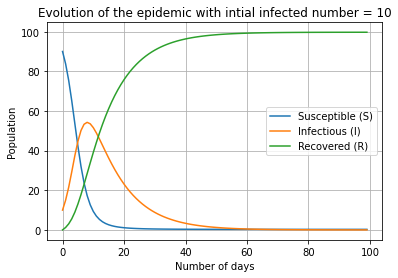

In [12]:
beta=0.58
gamma=1/10

def SIRK4(i0,N,nbjours):

    dt = 1
    S=np.zeros(nbjours)
    I=np.zeros(nbjours)
    R=np.zeros(nbjours)

    I[0]=i0
    S[0]=N-i0
    R[0]=0
    
    for i in range(nbjours - 1):
        
        #k1
        k1_S = (-beta * S[i] * I[i]) / N * dt
        k1_I = ((beta * S[i] * I[i]) / N - gamma * I[i] ) * dt
        k1_R = gamma * I[i] * dt
        
        S_k1 = S[i] + k1_S
        I_k1 = I[i] + k1_I
        R_k1 = R[i] + k1_R
        
        #k2
        S_k2 = S[i] + 0.5 * k1_S
        I_k2 = I[i] + 0.5 * k1_I
        R_k2 = R[i] + 0.5 * k1_R
        
        k2_S = (-beta * S_k2 * I_k2) / N * dt
        k2_I = ((beta * S_k2 * I_k2) / N - gamma * I_k2 ) * dt
        k2_R = gamma * I_k2 * dt
        
        #k3
        S_k3 = S[i] + 0.5 * k2_S
        I_k3 = I[i] + 0.5 * k2_I
        R_k3 = R[i] + 0.5 * k2_R
        
        k3_S = (-beta * S_k3 * I_k3) / N * dt
        k3_I = ((beta * S_k3 * I_k3) / N - gamma * I_k3 ) * dt
        k3_R = gamma * I_k3 * dt
        
        #k4
        S_k4 = S[i] + k3_S
        I_k4 = I[i] + k3_I
        R_k4 = R[i] + k3_R
        
        k4_S = (-beta * S_k4 * I_k4) / N * dt
        k4_I = ((beta * S_k4 * I_k4) / N - gamma * I_k4 ) * dt
        k4_R = gamma * I_k4 * dt
        
        #finding n+1
        S[i+1] = S[i] + (k1_S + 2*k2_S + 2*k3_S + k4_S) / 6
        I[i+1] = I[i] + (k1_I + 2*k2_I + 2*k3_I + k4_I) / 6
        R[i+1] = R[i] + (k1_R + 2*k2_R + 2*k3_R + k4_R) / 6

    return S, I, R

N = 100
i0 = 10
nbjours = 100

S,I,R=SIRK4(i0, N, nbjours)
plt.plot(S,label="Susceptible (S)")
plt.plot(I,label="Infectious (I)")
plt.plot(R,label="Recovered (R)")
plt.xlabel("Number of days")
plt.ylabel("Population")
plt.title(f"Evolution of the epidemic with intial infected number = 10")
plt.legend()
plt.grid(True)
plt.show()

# SEIRD Euler Method (constant $\beta$)

In [7]:
def seird_model(i0, N, nbday, beta, sigma, gamma, mu, e0=0):

    # Creation of lists
    S = np.zeros(nbday)
    E = np.zeros(nbday)
    I = np.zeros(nbday)
    R = np.zeros(nbday)
    D = np.zeros(nbday)

    # Initial Condition
    I[0] = i0
    E[0] = e0
    R[0] = 0
    D[0] = 0
    S[0] = N - i0 - e0 - R[0] - D[0] # Total must sum to N

    # Propagation
    for i in range(nbday - 1):

        S[i+1] = S[i] - beta * I[i] * S[i] / N
        E[i+1] = E[i] + beta * I[i] * S[i] / N - sigma * E[i]
        I[i+1] = I[i] + sigma * E[i] - gamma * I[i] - mu * I[i]
        R[i+1] = R[i] + gamma * I[i]
        D[i+1] = D[i] + mu * I[i]

    return S, E, I, R, D

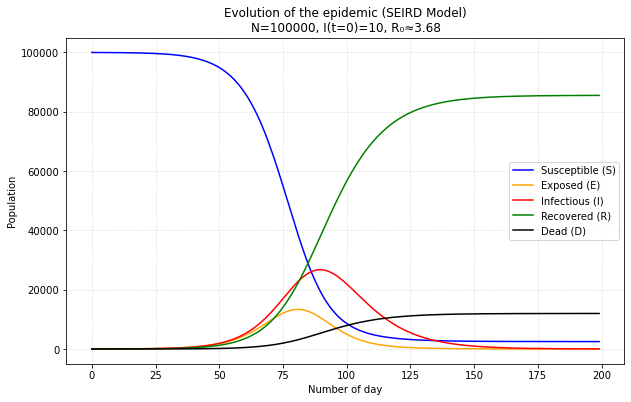

In [8]:
#Parameters and Initial Conditions
N_total = 100000 # Total population
i_initial = 10   # Initial infected (I0)
e_initial = 10   # Initial exposed (E0)
days = 200       # Number of days to simulate

#Model Parameters (Random Values)
beta = 0.3      # Transmission rate (R0 = beta / (gamma + mu))
sigma = 1/5     # Incubation rate (1/incubation period, e.g., 5 days)
gamma = 1/14    # Recovery rate (1/recovery period, e.g., 14 days)
mu = 0.01       # Mortality rate

#Run the SEIRD simulation
S, E, I, R, D = seird_model(i_initial, N_total, days, beta, sigma, gamma, mu, e0=e_initial)

plt.figure(figsize=(10, 6))

plt.plot(S, label="Susceptible (S)", color='blue')
plt.plot(E, label="Exposed (E)", color='orange')
plt.plot(I, label="Infectious (I)", color='red')
plt.plot(R, label="Recovered (R)", color='green')
plt.plot(D, label="Dead (D)", color='black')
plt.xlabel("Number of day")
plt.ylabel("Population")
plt.title(f"Evolution of the epidemic (SEIRD Model)\nN={N_total}, I(t=0)={int(I[0])}, R₀≈{beta/(gamma+mu):.2f}")
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

# SEIRD RK2 Method (constant $\beta$)

In [9]:
def SEIRDRK2(i0, N,nbjours, beta, sigma, gamma, mu, e0=0):

  dt = 1
  # Creation of lists
  S=np.zeros(nbjours)
  E=np.zeros(nbjours)
  I=np.zeros(nbjours)
  R=np.zeros(nbjours)
  D=np.zeros(nbjours)

 # Initial Condition
  I[0] = i0
  E[0] = e0
  R[0] = 0
  D[0] = 0
  S[0] = N - i0 - e0 - R[0] - D[0] # Total must sum to N
  for i in range(nbjours - 1):
      #k1
      k1_S = (-beta * S[i] * I[i]) / N * dt
      k1_E = (beta * I[i] * S[i] / N - sigma * E[i] )  * dt
      k1_I = (sigma * E[i] - gamma * I[i] - mu * I[i]) * dt
      k1_R = gamma * I[i] * dt
      k1_D = mu * I[i] * dt

      #Un + k1

      S_k1 = S[i] + k1_S
      E_k1 = E[i] + k1_E
      I_k1 = I[i] + k1_I
      R_k1 = R[i] + k1_R
      D_k1 = D[i] + k1_D

      #k2
      k2_S = (-beta * S_k1 * I_k1) / N * dt
      k2_E = (beta * I_k1 *  S_k1 / N - sigma * E_k1)     * dt
      k2_I = ((beta * S_k1 * I_k1) / N - gamma * I_k1) * dt
      k2_R = gamma * I_k1 * dt
      k2_D = mu * I_k1 * dt

      #Un+1
      S[i+1] = S[i] + 0.5 * (k1_S + k2_S)
      E[i+1] = E[i] + 0.5 * (k1_E + k2_E)
      I[i+1] = I[i] + 0.5 * (k1_I + k2_I)
      R[i+1] = R[i] + 0.5 * (k1_R + k2_R)
      D[i+1] = E[i] + 0.5 * (k1_D + k2_D)

  return S,E,I,R,D

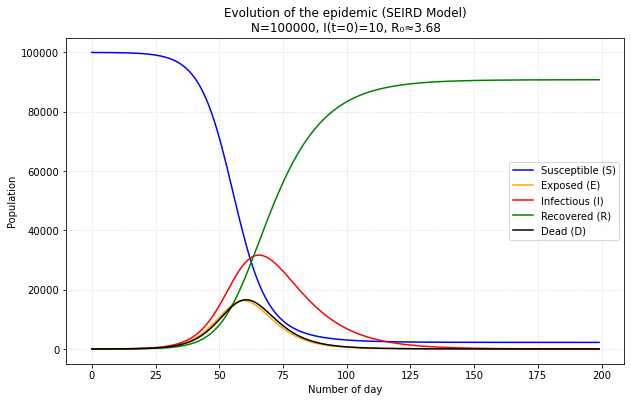

In [11]:
#Define Parameters and Initial Conditions
N_total = 100000 # Total population
i_initial = 10   # Initial infected (I0)
e_initial = 10   # Initial exposed (E0)
days = 200       # Number of days to simulate

#Model Parameters (Random Values)
beta = 0.3      # Transmission rate (R0 = beta / (gamma + mu))
sigma = 1/5     # Incubation rate (1/incubation period, e.g., 5 days)
gamma = 1/14    # Recovery rate (1/recovery period, e.g., 14 days)
mu = 0.01       # Mortality rate

#Run the SEIRD simulation
S, E, I, R, D = SEIRDRK2(i_initial, N_total, days, beta, sigma, gamma, mu, e0=e_initial)

plt.figure(figsize=(10, 6))

plt.plot(S, label="Susceptible (S)", color='blue')
plt.plot(E, label="Exposed (E)", color='orange')
plt.plot(I, label="Infectious (I)", color='red')
plt.plot(R, label="Recovered (R)", color='green')
plt.plot(D, label="Dead (D)", color='black')
plt.xlabel("Number of day")
plt.ylabel("Population")
plt.title(f"Evolution of the epidemic (SEIRD Model)\nN={N_total}, I(t=0)={int(I[0])}, R₀≈{beta/(gamma+mu):.2f}")
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

# SEIR Model

SEIR model: For many important infections, there is a significant latency period during which individuals have been infected but are not yet infectious themselves. During this period the individual is in compartment E (for exposed). (Wikipedia)  
We add another ODE for E:  
> $\frac{dE}{dt} = \frac{\beta I S}{N} - (\mu + a)E$  

and a is defined as: the latency period is a random variable with exponential distribution with parameter 
a (i.e. the average latency period is $a^{-1}$) (Wikipedia)

# SEIR Euler Method (constant $\beta$)

In [14]:
def seir_model(i0, N, nbday, beta, sigma, gamma, e0=0):

    # Creation of lists
    S = np.zeros(nbday)
    E = np.zeros(nbday)
    I = np.zeros(nbday)
    R = np.zeros(nbday)

    # Initial Condition
    I[0] = i0
    E[0] = e0
    R[0] = 0
    S[0] = N - i0 - e0 - R[0]   # Total must sum to N

    # Propagation
    for i in range(nbday - 1):

        S[i+1] = S[i] - beta * I[i] * S[i] / N
        E[i+1] = E[i] + beta * I[i] * S[i] / N - sigma * E[i]
        I[i+1] = I[i] + sigma * E[i] - gamma * I[i]
        R[i+1] = R[i] + gamma * I[i]

    return S, E, I, R

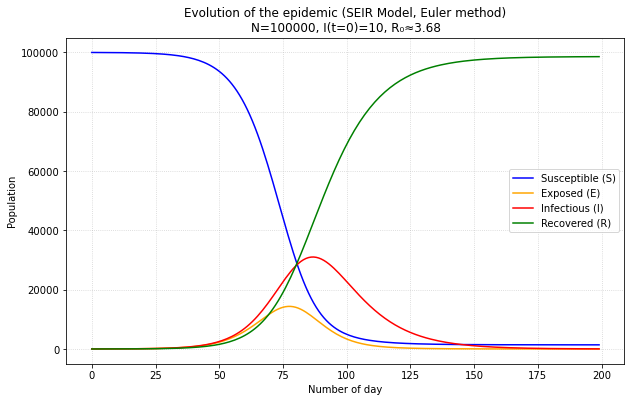

In [15]:
# Define Parameters and Initial Conditions
N_total = 100000 # Total population
i_initial = 10   # Initial infected (I0)
e_initial = 10   # Initial exposed (E0)
days = 200       # Number of days to simulate

# Model Parameters (Random Values)
beta = 0.3      # Transmission rate (R0 = beta / (gamma + mu))
sigma = 1/5     # Incubation rate (1/incubation period, e.g., 5 days)
gamma = 1/14    # Recovery rate (1/recovery period, e.g., 14 days)
mu = 0.01       # Mortality rate

# Run the SEIRD simulation
S, E, I, R = seir_model(i_initial, N_total, days, beta, sigma, gamma, e0=e_initial)

plt.figure(figsize=(10, 6))

plt.plot(S, label="Susceptible (S)", color='blue')
plt.plot(E, label="Exposed (E)", color='orange')
plt.plot(I, label="Infectious (I)", color='red')
plt.plot(R, label="Recovered (R)", color='green')
plt.xlabel("Number of day")
plt.ylabel("Population")
plt.title(f"Evolution of the epidemic (SEIR Model, Euler method)\nN={N_total}, I(t=0)={int(I[0])}, R₀≈{beta/(gamma+mu):.2f}")
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

# SEIR RK2 Method (constant $\beta$)

In [16]:
def SEIRRK2(i0, N, nbjours, beta, sigma, gamma, e0=0):

    dt = 1
    # Creation of lists
    S = np.zeros(nbjours)
    E = np.zeros(nbjours)
    I = np.zeros(nbjours)
    R = np.zeros(nbjours)

    # Initial Condition
    I[0] = i0
    E[0] = e0
    R[0] = 0
    S[0] = N - i0 - e0 - R[0]   # Total must sum to N

    for i in range(nbjours - 1):

        # k1
        k1_S = (-beta * S[i] * I[i]) / N * dt
        k1_E = (beta * I[i] * S[i] / N - sigma * E[i]) * dt
        k1_I = (sigma * E[i] - gamma * I[i]) * dt
        k1_R = (gamma * I[i]) * dt

        # U + k1
        S_k1 = S[i] + k1_S
        E_k1 = E[i] + k1_E
        I_k1 = I[i] + k1_I
        R_k1 = R[i] + k1_R

        # k2
        k2_S = (-beta * S_k1 * I_k1) / N * dt
        k2_E = (beta * I_k1 * S_k1 / N - sigma * E_k1) * dt
        k2_I = (sigma * E_k1 - gamma * I_k1) * dt
        k2_R = (gamma * I_k1) * dt

        # U(n+1)
        S[i+1] = S[i] + 0.5 * (k1_S + k2_S)
        E[i+1] = E[i] + 0.5 * (k1_E + k2_E)
        I[i+1] = I[i] + 0.5 * (k1_I + k2_I)
        R[i+1] = R[i] + 0.5 * (k1_R + k2_R)

    return S, E, I, R

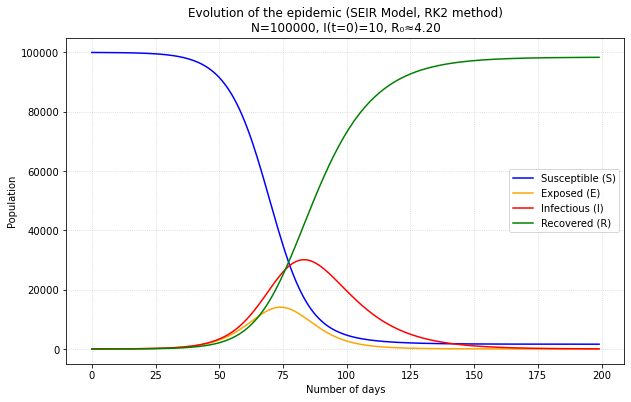

In [17]:
#Define Parameters and Initial Conditions
N_total = 100000  # Total population
i_initial = 10    # Initial infected (I0)
e_initial = 10    # Initial exposed (E0)
days = 200        # Number of days to simulate

# Model Parameters
beta = 0.3
sigma = 1/5
gamma = 1/14

# Run the SEIR simulation
S, E, I, R = SEIRRK2(i_initial, N_total, days, beta, sigma, gamma, e0=e_initial)

plt.figure(figsize=(10, 6))

plt.plot(S, label="Susceptible (S)", color='blue')
plt.plot(E, label="Exposed (E)", color='orange')
plt.plot(I, label="Infectious (I)", color='red')
plt.plot(R, label="Recovered (R)", color='green')

plt.xlabel("Number of days")
plt.ylabel("Population")
plt.title(f"Evolution of the epidemic (SEIR Model, RK2 method)\nN={N_total}, I(t=0)={int(I[0])}, R₀≈{beta/gamma:.2f}")
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

# SEIR RK4 Method (constant $\beta$)

In [18]:
def SEIRRK4(i0, N, nbjours, beta, sigma, gamma, e0=0):

    dt = 1
    # Creation of lists
    S = np.zeros(nbjours)
    E = np.zeros(nbjours)
    I = np.zeros(nbjours)
    R = np.zeros(nbjours)

    # Initial Condition
    I[0] = i0
    E[0] = e0
    R[0] = 0
    S[0] = N - i0 - e0 - R[0]

    for i in range(nbjours - 1):

        # --- k1 ---
        k1_S = (-beta * S[i] * I[i] / N) * dt
        k1_E = (beta * S[i] * I[i] / N - sigma * E[i]) * dt
        k1_I = (sigma * E[i] - gamma * I[i]) * dt
        k1_R = (gamma * I[i]) * dt

        # U + k1/2
        S1 = S[i] + 0.5 * k1_S
        E1 = E[i] + 0.5 * k1_E
        I1 = I[i] + 0.5 * k1_I
        R1 = R[i] + 0.5 * k1_R

        # --- k2 ---
        k2_S = (-beta * S1 * I1 / N) * dt
        k2_E = (beta * S1 * I1 / N - sigma * E1) * dt
        k2_I = (sigma * E1 - gamma * I1) * dt
        k2_R = (gamma * I1) * dt

        # U + k2/2
        S2 = S[i] + 0.5 * k2_S
        E2 = E[i] + 0.5 * k2_E
        I2 = I[i] + 0.5 * k2_I
        R2 = R[i] + 0.5 * k2_R

        # --- k3 ---
        k3_S = (-beta * S2 * I2 / N) * dt
        k3_E = (beta * S2 * I2 / N - sigma * E2) * dt
        k3_I = (sigma * E2 - gamma * I2) * dt
        k3_R = (gamma * I2) * dt

        # U + k3
        S3 = S[i] + k3_S
        E3 = E[i] + k3_E
        I3 = I[i] + k3_I
        R3 = R[i] + k3_R

        # --- k4 ---
        k4_S = (-beta * S3 * I3 / N) * dt
        k4_E = (beta * S3 * I3 / N - sigma * E3) * dt
        k4_I = (sigma * E3 - gamma * I3) * dt
        k4_R = (gamma * I3) * dt

        # --- Update (RK4 formula) ---
        S[i+1] = S[i] + (k1_S + 2*k2_S + 2*k3_S + k4_S) / 6
        E[i+1] = E[i] + (k1_E + 2*k2_E + 2*k3_E + k4_E) / 6
        I[i+1] = I[i] + (k1_I + 2*k2_I + 2*k3_I + k4_I) / 6
        R[i+1] = R[i] + (k1_R + 2*k2_R + 2*k3_R + k4_R) / 6

    return S, E, I, R

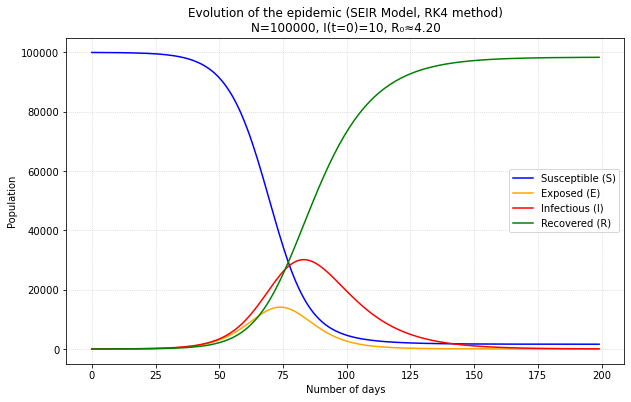

In [19]:
#Define Parameters and Initial Conditions
N_total = 100000  # Total population
i_initial = 10    # Initial infected (I0)
e_initial = 10    # Initial exposed (E0)
days = 200        # Number of days to simulate

# Model Parameters
beta = 0.3
sigma = 1/5
gamma = 1/14

#Run the SEIR simulation
S, E, I, R = SEIRRK4(i_initial, N_total, days, beta, sigma, gamma, e0=e_initial)

plt.figure(figsize=(10, 6))

plt.plot(S, label="Susceptible (S)", color='blue')
plt.plot(E, label="Exposed (E)", color='orange')
plt.plot(I, label="Infectious (I)", color='red')
plt.plot(R, label="Recovered (R)", color='green')

plt.xlabel("Number of days")
plt.ylabel("Population")
plt.title(f"Evolution of the epidemic (SEIR Model, RK4 method)\nN={N_total}, I(t=0)={int(I[0])}, R₀≈{beta/gamma:.2f}")
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

# Comparing SEIR numerical methods

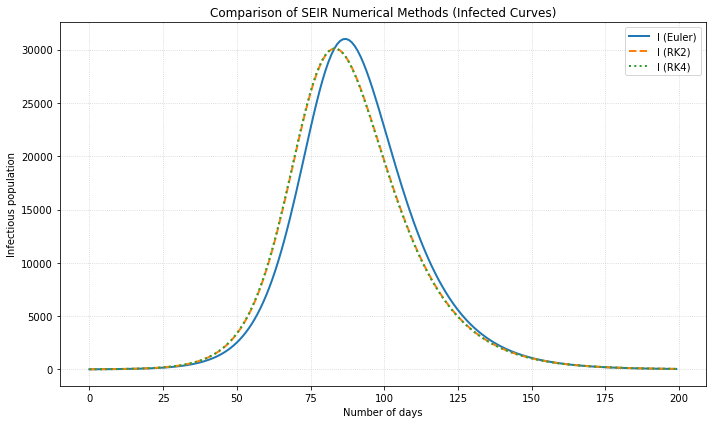

In [20]:
S_eu, E_eu, I_eu, R_eu = seir_model(i_initial, N_total, days, beta, sigma, gamma, e0=e_initial)
S_rk2, E_rk2, I_rk2, R_rk2 = SEIRRK2(i_initial, N_total, days, beta, sigma, gamma, e0=e_initial)
S_rk4, E_rk4, I_rk4, R_rk4 = SEIRRK4(i_initial, N_total, days, beta, sigma, gamma, e0=e_initial)

plt.figure(figsize=(10, 6))

plt.plot(I_eu, label="I (Euler)", linewidth=2)
plt.plot(I_rk2, label="I (RK2)", linestyle="--", linewidth=2)
plt.plot(I_rk4, label="I (RK4)", linestyle=":", linewidth=2)

plt.xlabel("Number of days")
plt.ylabel("Infectious population")
plt.title("Comparison of SEIR Numerical Methods (Infected Curves)")
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

In [22]:
# Comparing efficiencies (runtimes)
import time

# Euler
t0 = time.time()
S_eu, E_eu, I_eu, R_eu = seir_model(i_initial, N_total, days, beta, sigma, gamma, e0=e_initial)
t_eu = time.time() - t0

# RK2
t0 = time.time()
S_rk2, E_rk2, I_rk2, R_rk2 = SEIRRK2(i_initial, N_total, days, beta, sigma, gamma, e0=e_initial)
t_rk2 = time.time() - t0

# RK4
t0 = time.time()
S_rk4, E_rk4, I_rk4, R_rk4 = SEIRRK4(i_initial, N_total, days, beta, sigma, gamma, e0=e_initial)
t_rk4 = time.time() - t0

print(f"Euler method: {t_eu:.6f} s")
print(f"RK2 method:   {t_rk2:.6f} s")
print(f"RK4 method:   {t_rk4:.6f} s")

Euler method: 0.001663 s
RK2 method:   0.003048 s
RK4 method:   0.007818 s


# SEIRDV Model

SEIRDV model: we add deceased and vaccinated rates to the SEIR model. We use $\mu$ as our fatality rate (attached to D) and $\nu$ as our vaccination rate (attached to V).  
New ODEs added are simply:  
>$\frac{dV}{dt} = \nu S$  
$\frac{dD}{dt} = \mu I$

# SEIRDV Euler Method (constant $\beta$)

In [24]:
def seirdv_model(i0, N, nbday, beta, sigma, gamma, mu, nu, e0=0):

    # Creation of lists
    S = np.zeros(nbday)
    E = np.zeros(nbday)
    I = np.zeros(nbday)
    R = np.zeros(nbday)
    D = np.zeros(nbday)
    V = np.zeros(nbday)

    # Initial Condition
    I[0] = i0
    E[0] = e0
    R[0] = 0
    D[0] = 0
    V[0] = 0
    S[0] = N - i0 - e0 - R[0] - D[0] - V[0]

    # Propagation
    for i in range(nbday - 1):

        # Force of infection
        infection = beta * I[i] * S[i] / N

        # Updates
        S[i+1] = S[i] - infection - nu * S[i]
        E[i+1] = E[i] + infection - sigma * E[i]
        I[i+1] = I[i] + sigma * E[i] - gamma * I[i] - mu * I[i]
        R[i+1] = R[i] + gamma * I[i]
        D[i+1] = D[i] + mu * I[i]
        V[i+1] = V[i] + nu * S[i]

    return S, E, I, R, D, V

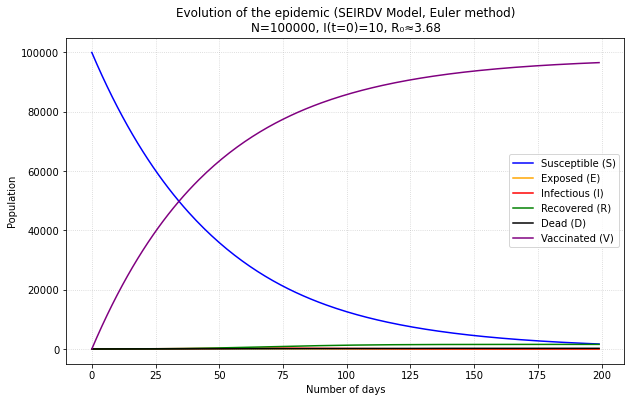

In [25]:
# Define Parameters and Initial Conditions
N_total = 100000  # Total population
i_initial = 10    # Initial infected (I0)
e_initial = 10    # Initial exposed (E0)
days = 200        # Number of days to simulate

# Model Parameters
beta = 0.3        # Transmission rate
sigma = 1/5       # Incubation rate
gamma = 1/14      # Recovery rate
mu = 0.01         # Mortality rate
nu = 0.02         # Vaccination rate

# Run the SEIRDV simulation
S, E, I, R, D, V = seirdv_model(i_initial, N_total, days, beta, sigma, gamma, mu, nu, e0=e_initial)

plt.figure(figsize=(10, 6))

plt.plot(S, label="Susceptible (S)", color='blue')
plt.plot(E, label="Exposed (E)", color='orange')
plt.plot(I, label="Infectious (I)", color='red')
plt.plot(R, label="Recovered (R)", color='green')
plt.plot(D, label="Dead (D)", color='black')
plt.plot(V, label="Vaccinated (V)", color='purple')

plt.xlabel("Number of days")
plt.ylabel("Population")
plt.title(f"Evolution of the epidemic (SEIRDV Model, Euler method)\nN={N_total}, I(t=0)={int(I[0])}, R₀≈{beta/(gamma+mu):.2f}")
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

# SEIRDV RK2 Method (constant $\beta$)

In [26]:
def SEIRDV_RK2(i0, N, nbjours, beta, sigma, gamma, mu, nu, e0=0):

    dt = 1
    # Lists
    S = np.zeros(nbjours)
    E = np.zeros(nbjours)
    I = np.zeros(nbjours)
    R = np.zeros(nbjours)
    D = np.zeros(nbjours)
    V = np.zeros(nbjours)

    # Initial conditions
    I[0] = i0
    E[0] = e0
    R[0] = 0
    D[0] = 0
    V[0] = 0
    S[0] = N - i0 - e0

    for i in range(nbjours - 1):

        # --- k1 ---
        k1_S = (-beta*S[i]*I[i]/N - nu*S[i]) * dt
        k1_E = (beta*S[i]*I[i]/N - sigma*E[i]) * dt
        k1_I = (sigma*E[i] - gamma*I[i] - mu*I[i]) * dt
        k1_R = (gamma*I[i]) * dt
        k1_D = (mu*I[i]) * dt
        k1_V = (nu*S[i]) * dt

        # U + k1
        S1 = S[i] + k1_S
        E1 = E[i] + k1_E
        I1 = I[i] + k1_I
        R1 = R[i] + k1_R
        D1 = D[i] + k1_D
        V1 = V[i] + k1_V

        # --- k2 ---
        k2_S = (-beta*S1*I1/N - nu*S1) * dt
        k2_E = (beta*S1*I1/N - sigma*E1) * dt
        k2_I = (sigma*E1 - gamma*I1 - mu*I1) * dt
        k2_R = (gamma*I1) * dt
        k2_D = (mu*I1) * dt
        k2_V = (nu*S1) * dt

        # Combine (RK2 = midpoint)
        S[i+1] = S[i] + 0.5*(k1_S + k2_S)
        E[i+1] = E[i] + 0.5*(k1_E + k2_E)
        I[i+1] = I[i] + 0.5*(k1_I + k2_I)
        R[i+1] = R[i] + 0.5*(k1_R + k2_R)
        D[i+1] = D[i] + 0.5*(k1_D + k2_D)
        V[i+1] = V[i] + 0.5*(k1_V + k2_V)

    return S, E, I, R, D, V

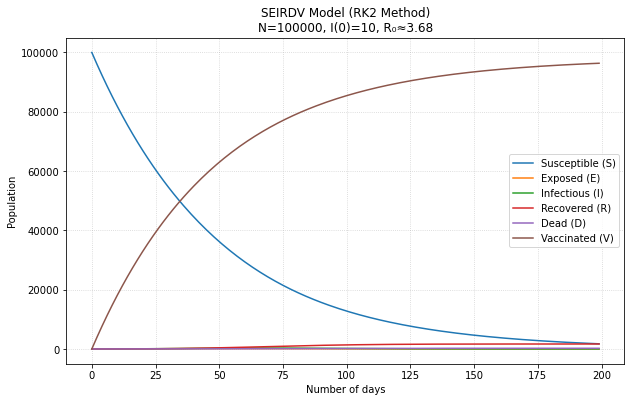

In [27]:
# Define Parameters and Initial Conditions
N_total = 100000
i_initial = 10
e_initial = 10
days = 200

# Model parameters
beta = 0.3
sigma = 1/5
gamma = 1/14
mu = 0.01
nu = 0.02

# Run the SEIRDV RK2 simulation
S, E, I, R, D, V = SEIRDV_RK2(i_initial, N_total, days, beta, sigma, gamma, mu, nu, e0=e_initial)

plt.figure(figsize=(10, 6))

plt.plot(S, label="Susceptible (S)")
plt.plot(E, label="Exposed (E)")
plt.plot(I, label="Infectious (I)")
plt.plot(R, label="Recovered (R)")
plt.plot(D, label="Dead (D)")
plt.plot(V, label="Vaccinated (V)")

plt.xlabel("Number of days")
plt.ylabel("Population")
plt.title(f"SEIRDV Model (RK2 Method)\nN={N_total}, I(0)={int(I[0])}, R₀≈{beta/(gamma+mu):.2f}")
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

# SEIRDV RK4 Method (constant $\beta$)

In [28]:
def SEIRDV_RK4(i0, N, nbjours, beta, sigma, gamma, mu, nu, e0=0):

    dt = 1
    # Lists
    S = np.zeros(nbjours)
    E = np.zeros(nbjours)
    I = np.zeros(nbjours)
    R = np.zeros(nbjours)
    D = np.zeros(nbjours)
    V = np.zeros(nbjours)

    # Initial conditions
    I[0] = i0
    E[0] = e0
    R[0] = 0
    D[0] = 0
    V[0] = 0
    S[0] = N - i0 - e0

    for i in range(nbjours - 1):

        # --- k1 ---
        k1_S = (-beta*S[i]*I[i]/N - nu*S[i]) * dt
        k1_E = (beta*S[i]*I[i]/N - sigma*E[i]) * dt
        k1_I = (sigma*E[i] - gamma*I[i] - mu*I[i]) * dt
        k1_R = (gamma*I[i]) * dt
        k1_D = (mu*I[i]) * dt
        k1_V = (nu*S[i]) * dt

        # U + k1/2
        S1 = S[i] + 0.5*k1_S
        E1 = E[i] + 0.5*k1_E
        I1 = I[i] + 0.5*k1_I
        R1 = R[i] + 0.5*k1_R
        D1 = D[i] + 0.5*k1_D
        V1 = V[i] + 0.5*k1_V

        # --- k2 ---
        k2_S = (-beta*S1*I1/N - nu*S1) * dt
        k2_E = (beta*S1*I1/N - sigma*E1) * dt
        k2_I = (sigma*E1 - gamma*I1 - mu*I1) * dt
        k2_R = (gamma*I1) * dt
        k2_D = (mu*I1) * dt
        k2_V = (nu*S1) * dt

        # U + k2/2
        S2 = S[i] + 0.5*k2_S
        E2 = E[i] + 0.5*k2_E
        I2 = I[i] + 0.5*k2_I
        R2 = R[i] + 0.5*k2_R
        D2 = D[i] + 0.5*k2_D
        V2 = V[i] + 0.5*k2_V

        # --- k3 ---
        k3_S = (-beta*S2*I2/N - nu*S2) * dt
        k3_E = (beta*S2*I2/N - sigma*E2) * dt
        k3_I = (sigma*E2 - gamma*I2 - mu*I2) * dt
        k3_R = (gamma*I2) * dt
        k3_D = (mu*I2) * dt
        k3_V = (nu*S2) * dt

        # U + k3
        S3 = S[i] + k3_S
        E3 = E[i] + k3_E
        I3 = I[i] + k3_I
        R3 = R[i] + k3_R
        D3 = D[i] + k3_D
        V3 = V[i] + k3_V

        # --- k4 ---
        k4_S = (-beta*S3*I3/N - nu*S3) * dt
        k4_E = (beta*S3*I3/N - sigma*E3) * dt
        k4_I = (sigma*E3 - gamma*I3 - mu*I3) * dt
        k4_R = (gamma*I3) * dt
        k4_D = (mu*I3) * dt
        k4_V = (nu*S3) * dt

        # Combine (RK4)
        S[i+1] = S[i] + (k1_S + 2*k2_S + 2*k3_S + k4_S)/6
        E[i+1] = E[i] + (k1_E + 2*k2_E + 2*k3_E + k4_E)/6
        I[i+1] = I[i] + (k1_I + 2*k2_I + 2*k3_I + k4_I)/6
        R[i+1] = R[i] + (k1_R + 2*k2_R + 2*k3_R + k4_R)/6
        D[i+1] = D[i] + (k1_D + 2*k2_D + 2*k3_D + k4_D)/6
        V[i+1] = V[i] + (k1_V + 2*k2_V + 2*k3_V + k4_V)/6

    return S, E, I, R, D, V

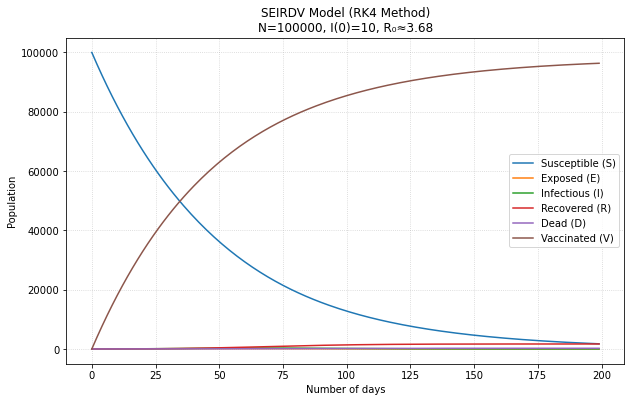

In [29]:
# Define Parameters and Initial Conditions
N_total = 100000
i_initial = 10
e_initial = 10
days = 200

# Model parameters
beta = 0.3
sigma = 1/5
gamma = 1/14
mu = 0.01
nu = 0.02

# Run the SEIRDV RK4 simulation
S, E, I, R, D, V = SEIRDV_RK4(i_initial, N_total, days, beta, sigma, gamma, mu, nu, e0=e_initial)

plt.figure(figsize=(10, 6))

plt.plot(S, label="Susceptible (S)")
plt.plot(E, label="Exposed (E)")
plt.plot(I, label="Infectious (I)")
plt.plot(R, label="Recovered (R)")
plt.plot(D, label="Dead (D)")
plt.plot(V, label="Vaccinated (V)")

plt.xlabel("Number of days")
plt.ylabel("Population")
plt.title(f"SEIRDV Model (RK4 Method)\nN={N_total}, I(0)={int(I[0])}, R₀≈{beta/(gamma+mu):.2f}")
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

# Gaussian time-dependent $\beta$

Using data from: Setianto, S., Hidayat, D. Modeling the time-dependent transmission rate using gaussian pulses for analyzing the COVID-19 outbreaks in the world. Sci Rep 13, 4466 (2023). https://doi.org/10.1038/s41598-023-31714-5

# SIR Gaussian $\beta$(t), RK4 method #

In [31]:
gamma=1/10

#defining beta as a function of time as a gaussian distribution (from the article on Github)
#r_m, t_m, d_m from article are gauss_height, t_centers, gauss_width

def make_beta_func(gauss_height, t_centers, gauss_width):
    gauss_height = np.asarray(gauss_height, dtype=float)
    t_centers = np.asarray(t_centers, dtype=float)
    gauss_width = np.asarray(gauss_width, dtype=float)

    def beta(t):
        return np.sum(
            gauss_height * np.exp(-((t - t_centers)**2) / (gauss_width**2))
        )

    return beta

In [32]:
def SIRK4_time_dependent_beta(i0, N, nbjours, beta_func):

    dt = 1
    S = np.zeros(nbjours)
    I = np.zeros(nbjours)
    R = np.zeros(nbjours)

    S[0] = N - i0
    I[0] = i0
    R[0] = 0

    for i in range(nbjours - 1):
        t = i * dt

        # beta values for RK4 stages
        b1 = beta_func(t)
        b2 = beta_func(t + 0.5 * dt)
        b3 = b2
        b4 = beta_func(t + dt)

        # k1
        k1_S = (-b1 * S[i] * I[i]) / N
        k1_I = (b1 * S[i] * I[i]) / N - gamma * I[i]
        k1_R = gamma * I[i]

        # k2
        S2 = S[i] + 0.5 * dt * k1_S
        I2 = I[i] + 0.5 * dt * k1_I
        R2 = R[i] + 0.5 * dt * k1_R

        k2_S = (-b2 * S2 * I2) / N
        k2_I = (b2 * S2 * I2) / N - gamma * I2
        k2_R = gamma * I2

        # k3
        S3 = S[i] + 0.5 * dt * k2_S
        I3 = I[i] + 0.5 * dt * k2_I
        R3 = R[i] + 0.5 * dt * k2_R

        k3_S = (-b3 * S3 * I3) / N
        k3_I = (b3 * S3 * I3) / N - gamma * I3
        k3_R = gamma * I3

        # k4
        S4 = S[i] + dt * k3_S
        I4 = I[i] + dt * k3_I
        R4 = R[i] + dt * k3_R

        k4_S = (-b4 * S4 * I4) / N
        k4_I = (b4 * S4 * I4) / N - gamma * I4
        k4_R = gamma * I4

        # Update
        S[i+1] = S[i] + dt*(k1_S + 2*k2_S + 2*k3_S + k4_S)/6
        I[i+1] = I[i] + dt*(k1_I + 2*k2_I + 2*k3_I + k4_I)/6
        R[i+1] = R[i] + dt*(k1_R + 2*k2_R + 2*k3_R + k4_R)/6

    return S, I, R

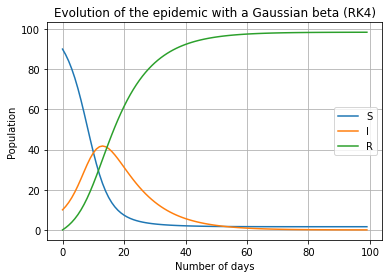

In [33]:
N = 100
i0 = 10
nbjours = 100

gauss_height_values = [0.01, 0.28, 0.19, 0.25, 0.04, 0.03, 0.03, 0.02, 0.02, 0.06, 0.01, 0.01, 0.02, 0.01, 0.02]
t_center = [0, 12, 44, 49, 160, 299, 457, 565, 718, 723, 787, 846, 916, 989, 1061]
gauss_width_values = [12, 18, 49, 23, 54, 89, 39, 50, 93, 19, 14, 9, 45, 29, 42]

beta_func = make_beta_func(gauss_height_values, t_center, gauss_width_values)

S, I, R = SIRK4_time_dependent_beta(i0, N, nbjours, beta_func)

plt.plot(S, label='S')
plt.plot(I, label='I')
plt.plot(R, label='R')
plt.legend()
plt.grid(True)
plt.xlabel("Number of days")
plt.ylabel("Population")
plt.title(f"Evolution of the epidemic with a Gaussian beta (RK4)")
plt.show()

# SIR Gaussian $\beta$(t), RK2 method #

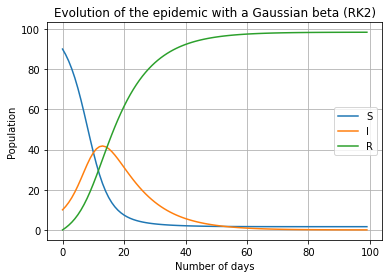

In [35]:
def SIRK2_time_dependent_beta(i0, N, nbjours, beta_func):

    dt = 1
    S = np.zeros(nbjours)
    I = np.zeros(nbjours)
    R = np.zeros(nbjours)

    S[0] = N - i0
    I[0] = i0
    R[0] = 0

    for i in range(nbjours - 1):
        t = i * dt

        b1 = beta_func(t)

        # k1
        k1_S = (-b1 * S[i] * I[i]) / N
        k1_I = (b1 * S[i] * I[i]) / N - gamma * I[i]
        k1_R = gamma * I[i]

        # midpoint estimates
        S_mid = S[i] + 0.5 * dt * k1_S
        I_mid = I[i] + 0.5 * dt * k1_I
        R_mid = R[i] + 0.5 * dt * k1_R

        b_mid = beta_func(t + 0.5 * dt)

        # k2 (midpoint slope)
        k2_S = (-b_mid * S_mid * I_mid) / N
        k2_I = (b_mid * S_mid * I_mid) / N - gamma * I_mid
        k2_R = gamma * I_mid

        # Update (RK2)
        S[i+1] = S[i] + dt * k2_S
        I[i+1] = I[i] + dt * k2_I
        R[i+1] = R[i] + dt * k2_R

    return S, I, R


# Parameters
N = 100
i0 = 10
nbjours = 100

gauss_height_values = [0.01, 0.28, 0.19, 0.25, 0.04, 0.03, 0.03, 0.02, 0.02, 0.06, 0.01, 0.01, 0.02, 0.01, 0.02]
t_center = [0, 12, 44, 49, 160, 299, 457, 565, 718, 723, 787, 846, 916, 989, 1061]
gauss_width_values = [12, 18, 49, 23, 54, 89, 39, 50, 93, 19, 14, 9, 45, 29, 42]

beta_func = make_beta_func(gauss_height_values, t_center, gauss_width_values)

S, I, R = SIRK2_time_dependent_beta(i0, N, nbjours, beta_func)

plt.plot(S, label='S')
plt.plot(I, label='I')
plt.plot(R, label='R')
plt.legend()
plt.grid(True)
plt.xlabel("Number of days")
plt.ylabel("Population")
plt.title("Evolution of the epidemic with a Gaussian beta (RK2)")
plt.show()

# SIR Gaussian $\beta$(t), Modified Euler method #

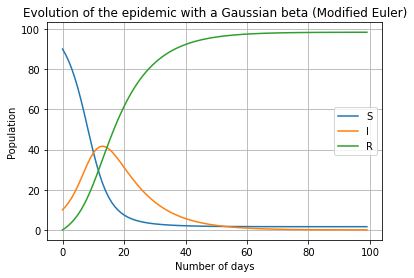

In [36]:
def SIR_modified_euler(i0, N, nbjours, beta_func):

    dt = 1
    S = np.zeros(nbjours)
    I = np.zeros(nbjours)
    R = np.zeros(nbjours)

    S[0] = N - i0
    I[0] = i0
    R[0] = 0

    for i in range(nbjours - 1):
        t = i * dt

        b1 = beta_func(t)

        # Modified Euler implementation
        k1_S = (-b1 * S[i] * I[i]) / N
        k1_I = (b1 * S[i] * I[i]) / N - gamma * I[i]
        k1_R = gamma * I[i]

        S_pred = S[i] + dt * k1_S
        I_pred = I[i] + dt * k1_I
        R_pred = R[i] + dt * k1_R

        b2 = beta_func(t + dt)

        # updating
        k2_S = (-b2 * S_pred * I_pred) / N
        k2_I = (b2 * S_pred * I_pred) / N - gamma * I_pred
        k2_R = gamma * I_pred

        S[i+1] = S[i] + 0.5 * dt * (k1_S + k2_S)
        I[i+1] = I[i] + 0.5 * dt * (k1_I + k2_I)
        R[i+1] = R[i] + 0.5 * dt * (k1_R + k2_R)

    return S, I, R


# Parameters
N = 100
i0 = 10
nbjours = 100

gauss_height_values = [0.01, 0.28, 0.19, 0.25, 0.04, 0.03, 0.03, 0.02, 0.02, 0.06, 0.01, 0.01, 0.02, 0.01, 0.02]
t_center = [0, 12, 44, 49, 160, 299, 457, 565, 718, 723, 787, 846, 916, 989, 1061]
gauss_width_values = [12, 18, 49, 23, 54, 89, 39, 50, 93, 19, 14, 9, 45, 29, 42]


beta_func = make_beta_func(gauss_height_values, t_center, gauss_width_values)

S, I, R = SIR_modified_euler(i0, N, nbjours, beta_func)

plt.plot(S, label='S')
plt.plot(I, label='I')
plt.plot(R, label='R')
plt.legend()
plt.grid(True)
plt.xlabel("Number of days")
plt.ylabel("Population")
plt.title("Evolution of the epidemic with a Gaussian beta (Modified Euler)")
plt.show()

# Comparing numerical methods for a Gaussian $\beta$

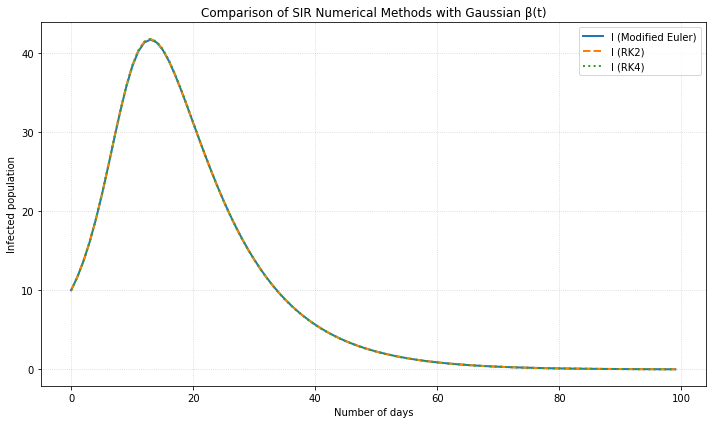

In [37]:
S_eu, I_eu, R_eu = SIR_modified_euler(i0, N, nbjours, beta_func)
S_rk2, I_rk2, R_rk2 = SIRK2_time_dependent_beta(i0, N, nbjours, beta_func)
S_rk4, I_rk4, R_rk4 = SIRK4_time_dependent_beta(i0, N, nbjours, beta_func)

plt.figure(figsize=(10, 6))

plt.plot(I_eu, label="I (Modified Euler)", linewidth=2)
plt.plot(I_rk2, label="I (RK2)", linestyle="--", linewidth=2)
plt.plot(I_rk4, label="I (RK4)", linestyle=":", linewidth=2)

plt.xlabel("Number of days")
plt.ylabel("Infected population")
plt.title("Comparison of SIR Numerical Methods with Gaussian β(t)")
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# Comparing three methods' efficiency

In [38]:
def time_solver(name, solver):
    start = time.perf_counter()
    S, I, R = solver(i0, N, nbjours, beta_func)
    end = time.perf_counter()
    print(f"{name} time: {end - start:.6f} seconds")

# comparing three methods
time_solver("RK4", SIRK4_time_dependent_beta)
time_solver("RK2", SIRK2_time_dependent_beta)
time_solver("Modified Euler", SIR_modified_euler)

RK4 time: 0.005931 seconds
RK2 time: 0.002407 seconds
Modified Euler time: 0.002305 seconds


# SEIR Gaussian $\beta$(t)#

Using same beta from article, same $r_m, t_m, d_m$ data, just modified to fit an SEIR model

# SEIR Gaussian $\beta(t)$, RK4 method

In [40]:
def SEIRRK4_time_dependent_beta(i0, N, nbjours, beta_func, sigma, gamma, e0=0):

    dt = 1
    S = np.zeros(nbjours)
    E = np.zeros(nbjours)
    I = np.zeros(nbjours)
    R = np.zeros(nbjours)

    I[0] = i0
    E[0] = e0
    R[0] = 0
    S[0] = N - i0 - e0

    for i in range(nbjours - 1):

        t = i * dt
        b1 = beta_func(t)
        b2 = beta_func(t + 0.5 * dt)
        b3 = b2
        b4 = beta_func(t + dt)

        # ----- k1 -----
        k1_S = (-b1 * S[i] * I[i] / N) * dt
        k1_E = (b1 * S[i] * I[i] / N - sigma * E[i]) * dt
        k1_I = (sigma * E[i] - gamma * I[i]) * dt
        k1_R = (gamma * I[i]) * dt

        S1 = S[i] + 0.5 * k1_S
        E1 = E[i] + 0.5 * k1_E
        I1 = I[i] + 0.5 * k1_I
        R1 = R[i] + 0.5 * k1_R

        # ----- k2 -----
        k2_S = (-b2 * S1 * I1 / N) * dt
        k2_E = (b2 * S1 * I1 / N - sigma * E1) * dt
        k2_I = (sigma * E1 - gamma * I1) * dt
        k2_R = (gamma * I1) * dt

        S2 = S[i] + 0.5 * k2_S
        E2 = E[i] + 0.5 * k2_E
        I2 = I[i] + 0.5 * k2_I
        R2 = R[i] + 0.5 * k2_R

        # ----- k3 -----
        k3_S = (-b3 * S2 * I2 / N) * dt
        k3_E = (b3 * S2 * I2 / N - sigma * E2) * dt
        k3_I = (sigma * E2 - gamma * I2) * dt
        k3_R = (gamma * I2) * dt

        S3 = S[i] + k3_S
        E3 = E[i] + k3_E
        I3 = I[i] + k3_I
        R3 = R[i] + k3_R

        # ----- k4 -----
        k4_S = (-b4 * S3 * I3 / N) * dt
        k4_E = (b4 * S3 * I3 / N - sigma * E3) * dt
        k4_I = (sigma * E3 - gamma * I3) * dt
        k4_R = (gamma * I3) * dt

        # Update
        S[i+1] = S[i] + (k1_S + 2*k2_S + 2*k3_S + k4_S) / 6
        E[i+1] = E[i] + (k1_E + 2*k2_E + 2*k3_E + k4_E) / 6
        I[i+1] = I[i] + (k1_I + 2*k2_I + 2*k3_I + k4_I) / 6
        R[i+1] = R[i] + (k1_R + 2*k2_R + 2*k3_R + k4_R) / 6

    return S, E, I, R

In [41]:
N = 100000
i0 = 10
e0 = 5
nbjours = 200

# Gaussian parameters
gauss_height_values = [0.01, 0.28, 0.19, 0.25, 0.04, 0.03, 0.03, 0.02, 0.02, 0.06, 0.01, 0.01, 0.02, 0.01, 0.02]
t_center = [0, 12, 44, 49, 160, 299, 457, 565, 718, 723, 787, 846, 916, 989, 1061]
gauss_width_values = [12, 18, 49, 23, 54, 89, 39, 50, 93, 19, 14, 9, 45, 29, 42]
beta_func = make_beta_func(gauss_height_values, t_center, gauss_width_values)

# SEIR parameters
sigma = 1/5
gamma = 1/14

# Run model
S, E, I, R = SEIRRK4_time_dependent_beta(i0, N, nbjours, beta_func, sigma, gamma, e0=e0)

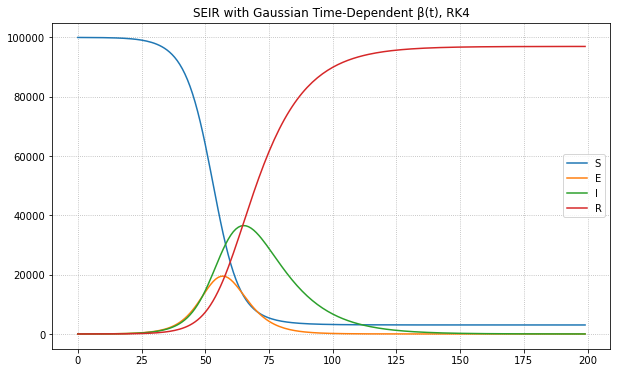

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(S, label="S")
plt.plot(E, label="E")
plt.plot(I, label="I")
plt.plot(R, label="R")
plt.legend()
plt.title("SEIR with Gaussian Time-Dependent β(t), RK4")
plt.grid(True, linestyle=":")
plt.show()

# SEIR Gaussian $\beta(t)$, RK2 method

In [43]:
def SEIRRK2_time_dependent_beta(i0, N, nbjours, beta_func, sigma, gamma, e0=0):

    dt = 1
    # Creation of lists
    S = np.zeros(nbjours)
    E = np.zeros(nbjours)
    I = np.zeros(nbjours)
    R = np.zeros(nbjours)

    # Initial Conditions
    I[0] = i0
    E[0] = e0
    R[0] = 0
    S[0] = N - i0 - e0 - R[0]

    for i in range(nbjours - 1):

        t = i * dt
        b1 = beta_func(t)          # beta for k1
        b2 = beta_func(t + dt)     # beta for k2

        # --- k1 ---
        k1_S = (-b1 * S[i] * I[i]) / N * dt
        k1_E = (b1 * S[i] * I[i] / N - sigma * E[i]) * dt
        k1_I = (sigma * E[i] - gamma * I[i]) * dt
        k1_R = (gamma * I[i]) * dt

        # U + k1
        S_k1 = S[i] + k1_S
        E_k1 = E[i] + k1_E
        I_k1 = I[i] + k1_I
        R_k1 = R[i] + k1_R

        # --- k2 ---
        k2_S = (-b2 * S_k1 * I_k1) / N * dt
        k2_E = (b2 * S_k1 * I_k1 / N - sigma * E_k1) * dt
        k2_I = (sigma * E_k1 - gamma * I_k1) * dt
        k2_R = (gamma * I_k1) * dt

        # --- Update ---
        S[i+1] = S[i] + 0.5 * (k1_S + k2_S)
        E[i+1] = E[i] + 0.5 * (k1_E + k2_E)
        I[i+1] = I[i] + 0.5 * (k1_I + k2_I)
        R[i+1] = R[i] + 0.5 * (k1_R + k2_R)

    return S, E, I, R

In [44]:
S, E, I, R = SEIRRK2_time_dependent_beta(i0, N, nbjours, beta_func, sigma, gamma, e0)

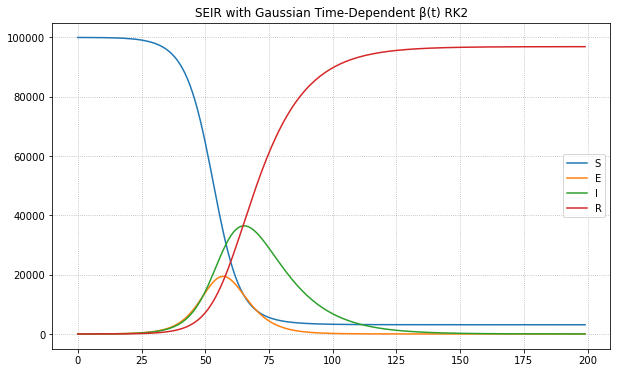

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(S, label="S")
plt.plot(E, label="E")
plt.plot(I, label="I")
plt.plot(R, label="R")
plt.legend()
plt.title("SEIR with Gaussian Time-Dependent β(t) RK2")
plt.grid(True, linestyle=":")
plt.show()

# SEIR Gaussian $\beta(t)$, Modified Euler method

In [46]:
def seir_model_time_dependent_beta(i0, N, nbjours, beta_func, sigma, gamma, e0=0):

    # Creation of lists
    S = np.zeros(nbjours)
    E = np.zeros(nbjours)
    I = np.zeros(nbjours)
    R = np.zeros(nbjours)

    # Initial Condition
    I[0] = i0
    E[0] = e0
    R[0] = 0
    S[0] = N - i0 - e0 - R[0]

    # Propagation
    for i in range(nbjours - 1):

        t = i
        beta = beta_func(t)

        S[i+1] = S[i] - beta * I[i] * S[i] / N
        E[i+1] = E[i] + beta * I[i] * S[i] / N - sigma * E[i]
        I[i+1] = I[i] + sigma * E[i] - gamma * I[i]
        R[i+1] = R[i] + gamma * I[i]

    return S, E, I, R

In [48]:
S, E, I, R = seir_model_time_dependent_beta(i0, N, nbjours, beta_func, sigma, gamma, e0)

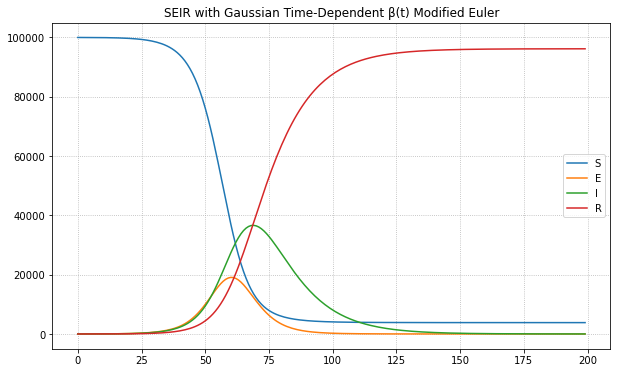

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(S, label="S")
plt.plot(E, label="E")
plt.plot(I, label="I")
plt.plot(R, label="R")
plt.legend()
plt.title("SEIR with Gaussian Time-Dependent β(t) Modified Euler")
plt.grid(True, linestyle=":")
plt.show()

# Comparing efficiency

In [50]:
def time_solver(name, solver):
    start = time.perf_counter()
    S, E, I, R = solver(i0, N, nbjours, beta_func, sigma, gamma, e0=0)
    end = time.perf_counter()
    print(f"{name} time: {end - start:.6f} seconds")

# comparing three methods
time_solver("RK4", SEIRRK4_time_dependent_beta)
time_solver("RK2", SEIRRK2_time_dependent_beta)
time_solver("Modified Euler", seir_model_time_dependent_beta)

RK4 time: 0.011577 seconds
RK2 time: 0.005201 seconds
Modified Euler time: 0.003515 seconds


# Sinusoidal time-dependent $\beta$

Using data from pages 334-335 of chapter 9 from: Brauer F, Castillo-Chavez C, Feng Z. Models for Influenza. Mathematical Models in Epidemiology. 2019 Jun 25;69:311–50. doi: 10.1007/978-1-4939-9828-9_9. PMCID: PMC7316090.

In [51]:
gamma=1/10

#defining beta as a sinusoidal function of time
#beta0 is mean contact rate, beta1 is 'amplitude of seasonality'

def make_beta_func(beta0, beta1):
    beta0 = float(beta0)
    beta1 = float(beta1)

    def beta(t):
        return beta0 * (1 + beta1 * np.cos(np.pi * t * 2))

    return beta

beta0 = 1.56
beta1 = 0.54 #these values taken from Models for Influenza chapter

beta_func = make_beta_func(beta0, beta1)

# Plotting $\beta$

$\beta$(t) is the time-dependent transmission rate of a disease, and represents how many infections each infected person produces per unit time.  
$\beta_0$ is the average transmission rate of a disease; a higher $\beta_0$ represents a more infectious disease.  
$\beta_1$ is the amplitude of seasonal variation; large $\beta_1$ means a drastic change in infectivity of a disease depending on time (e.g. time of year).  
The periodic oscillation has a unit of time that depends on the disease/over what length of time we are inspecting (1 unit = 1 year → yearly seasonal forcing; 1 unit = 1 day → daily cycles).

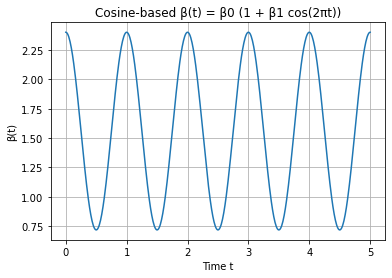

In [52]:
t = np.linspace(0, 5, 500)

# Compute beta values
beta_vals = beta_func(t)

plt.plot(t, beta_vals)
plt.title("Cosine-based β(t) = β0 (1 + β1 cos(2πt))")
plt.xlabel("Time t")
plt.ylabel("β(t)")
plt.grid(True)
plt.show()

# SIR cosine $\beta$(t), RK4 method #

In [54]:
def SIRK4_time_dependent_beta(i0, N, nbjours, beta_func):

    dt = 1
    S = np.zeros(nbjours)
    I = np.zeros(nbjours)
    R = np.zeros(nbjours)

    S[0] = N - i0
    I[0] = i0
    R[0] = 0

    for i in range(nbjours - 1):
        t = i * dt

        # beta values for RK4 stages
        b1 = beta_func(t)
        b2 = beta_func(t + 0.5 * dt)
        b3 = b2
        b4 = beta_func(t + dt)

        # k1
        k1_S = (-b1 * S[i] * I[i]) / N
        k1_I = (b1 * S[i] * I[i]) / N - gamma * I[i]
        k1_R = gamma * I[i]

        # k2
        S2 = S[i] + 0.5 * dt * k1_S
        I2 = I[i] + 0.5 * dt * k1_I
        R2 = R[i] + 0.5 * dt * k1_R

        k2_S = (-b2 * S2 * I2) / N
        k2_I = (b2 * S2 * I2) / N - gamma * I2
        k2_R = gamma * I2

        # k3
        S3 = S[i] + 0.5 * dt * k2_S
        I3 = I[i] + 0.5 * dt * k2_I
        R3 = R[i] + 0.5 * dt * k2_R

        k3_S = (-b3 * S3 * I3) / N
        k3_I = (b3 * S3 * I3) / N - gamma * I3
        k3_R = gamma * I3

        # k4
        S4 = S[i] + dt * k3_S
        I4 = I[i] + dt * k3_I
        R4 = R[i] + dt * k3_R

        k4_S = (-b4 * S4 * I4) / N
        k4_I = (b4 * S4 * I4) / N - gamma * I4
        k4_R = gamma * I4

        # Update
        S[i+1] = S[i] + dt*(k1_S + 2*k2_S + 2*k3_S + k4_S)/6
        I[i+1] = I[i] + dt*(k1_I + 2*k2_I + 2*k3_I + k4_I)/6
        R[i+1] = R[i] + dt*(k1_R + 2*k2_R + 2*k3_R + k4_R)/6

    return S, I, R

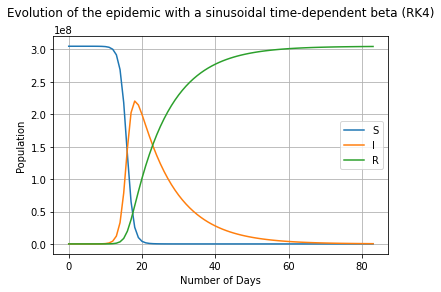

In [55]:
N = 305000000 #population of the US
i0 = 10
nbjours = 84

beta_func = make_beta_func(beta0, beta1)

S, I, R = SIRK4_time_dependent_beta(i0, N, nbjours, beta_func)

plt.plot(S, label='S')
plt.plot(I, label='I')
plt.plot(R, label='R')
plt.legend()
plt.grid(True)
plt.xlabel("Number of Days")
plt.ylabel("Population")
plt.title(f"Evolution of the epidemic with a sinusoidal time-dependent beta (RK4)", pad = 20)
plt.show()

# SIR cosine $\beta$(t), RK2 method #

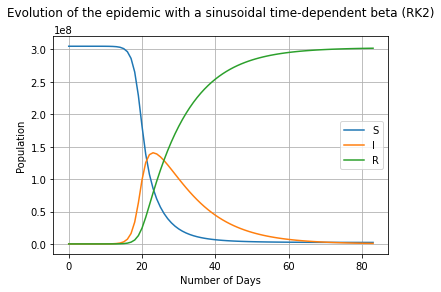

In [56]:
def SIRK2_time_dependent_beta(i0, N, nbjours, beta_func):

    dt = 1
    S = np.zeros(nbjours)
    I = np.zeros(nbjours)
    R = np.zeros(nbjours)

    S[0] = N - i0
    I[0] = i0
    R[0] = 0

    for i in range(nbjours - 1):
        t = i * dt

        b1 = beta_func(t)

        # k1
        k1_S = (-b1 * S[i] * I[i]) / N
        k1_I = (b1 * S[i] * I[i]) / N - gamma * I[i]
        k1_R = gamma * I[i]

        # midpoint estimates
        S_mid = S[i] + 0.5 * dt * k1_S
        I_mid = I[i] + 0.5 * dt * k1_I
        R_mid = R[i] + 0.5 * dt * k1_R

        b_mid = beta_func(t + 0.5 * dt)

        # k2 (midpoint slope)
        k2_S = (-b_mid * S_mid * I_mid) / N
        k2_I = (b_mid * S_mid * I_mid) / N - gamma * I_mid
        k2_R = gamma * I_mid

        # Update (RK2)
        S[i+1] = S[i] + dt * k2_S
        I[i+1] = I[i] + dt * k2_I
        R[i+1] = R[i] + dt * k2_R

    return S, I, R

beta_func = make_beta_func(beta0, beta1)

S, I, R = SIRK2_time_dependent_beta(i0, N, nbjours, beta_func)

plt.plot(S, label='S')
plt.plot(I, label='I')
plt.plot(R, label='R')
plt.legend()
plt.grid(True)
plt.xlabel("Number of Days")
plt.ylabel("Population")
plt.title("Evolution of the epidemic with a sinusoidal time-dependent beta (RK2)", pad=20)
plt.show()

# SIR cosine $\beta$(t), Modified Euler method #

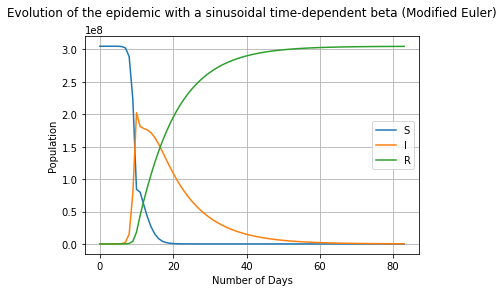

In [57]:
def SIR_modified_euler(i0, N, nbjours, beta_func):

    dt = 1
    S = np.zeros(nbjours)
    I = np.zeros(nbjours)
    R = np.zeros(nbjours)

    S[0] = N - i0
    I[0] = i0
    R[0] = 0

    for i in range(nbjours - 1):
        t = i * dt

        b1 = beta_func(t)

        # Modified Euler implementation
        k1_S = (-b1 * S[i] * I[i]) / N
        k1_I = (b1 * S[i] * I[i]) / N - gamma * I[i]
        k1_R = gamma * I[i]

        S_pred = S[i] + dt * k1_S
        I_pred = I[i] + dt * k1_I
        R_pred = R[i] + dt * k1_R

        b2 = beta_func(t + dt)

        # updating
        k2_S = (-b2 * S_pred * I_pred) / N
        k2_I = (b2 * S_pred * I_pred) / N - gamma * I_pred
        k2_R = gamma * I_pred

        S[i+1] = S[i] + 0.5 * dt * (k1_S + k2_S)
        I[i+1] = I[i] + 0.5 * dt * (k1_I + k2_I)
        R[i+1] = R[i] + 0.5 * dt * (k1_R + k2_R)

    return S, I, R

beta_func = make_beta_func(beta0, beta1)

S, I, R = SIR_modified_euler(i0, N, nbjours, beta_func)

plt.plot(S, label='S')
plt.plot(I, label='I')
plt.plot(R, label='R')
plt.legend()
plt.grid(True)
plt.xlabel("Number of Days")
plt.ylabel("Population")
plt.title("Evolution of the epidemic with a sinusoidal time-dependent beta (Modified Euler)", pad=20)
plt.show()

# Comparing three methods' efficiency

In [58]:
def time_solver(name, solver):
    start = time.perf_counter()
    S, I, R = solver(i0, N, nbjours, beta_func)
    end = time.perf_counter()
    print(f"{name} time: {end - start:.6f} seconds")

# comparing three methods
time_solver("RK4", SIRK4_time_dependent_beta)
time_solver("RK2", SIRK2_time_dependent_beta)
time_solver("Modified Euler", SIR_modified_euler)

RK4 time: 0.003258 seconds
RK2 time: 0.001371 seconds
Modified Euler time: 0.001224 seconds


# Comparing numerical methods

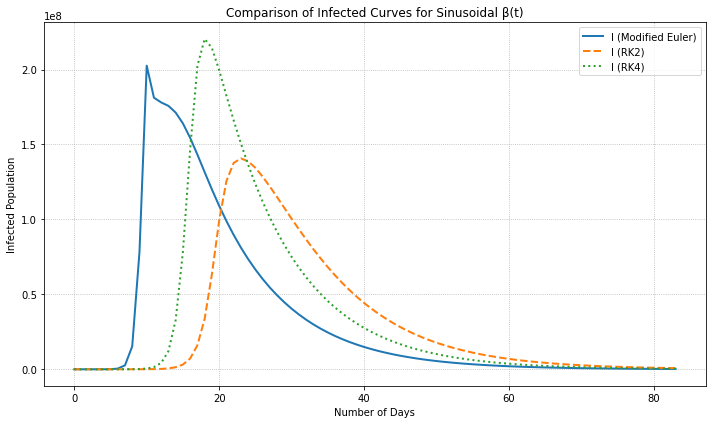

In [59]:
S_eu, I_eu, R_eu = SIR_modified_euler(i0, N, nbjours, beta_func)
S_rk2, I_rk2, R_rk2 = SIRK2_time_dependent_beta(i0, N, nbjours, beta_func)
S_rk4, I_rk4, R_rk4 = SIRK4_time_dependent_beta(i0, N, nbjours, beta_func)

plt.figure(figsize=(10, 6))

plt.plot(I_eu, label="I (Modified Euler)", linewidth=2)
plt.plot(I_rk2, label="I (RK2)", linestyle="--", linewidth=2)
plt.plot(I_rk4, label="I (RK4)", linestyle=":", linewidth=2)

plt.xlabel("Number of Days")
plt.ylabel("Infected Population")
plt.title("Comparison of Infected Curves for Sinusoidal β(t)")
plt.grid(True, linestyle=":")
plt.legend()
plt.tight_layout()
plt.show()